In [1]:
import pandas as pd
import numpy as np
import os

zadanie 1

In [2]:
DATAPATH = './data/'
df_zam = pd.read_csv(os.path.join(DATAPATH,'/content/zamowienia.csv'), sep=';')
print("1.1 Czy są wartości brakujące w oryginalnych danych?")
print(df_zam.isna().sum())


n = len(df_zam)
indices = np.random.choice(n, size=int(0.1*n), replace=False)
df_zam_with_missing = df_zam.copy()
df_zam_with_missing.loc[indices, 'Sprzedawca'] = 'BRAK'

# 1.3
indices = np.random.choice(n, size=int(0.05*n), replace=False)
df_zam_with_missing.loc[indices, 'idZamowienia'] = np.nan

# 1.4
indices = np.random.choice(n, size=int(0.2*n), replace=False)
df_zam_with_missing.loc[indices, 'Data zamowienia'] = np.nan

# 1.5
indices = np.random.choice(n, size=int(0.15*n), replace=False)
df_zam_with_missing.loc[indices, 'Utarg'] = np.nan

# 1.6
df_missing = df_zam_with_missing.copy()
print(" Podsumowanie wartości brakujących w zmodyfikowanym zbiorze:")
print(df_missing.isna().sum())

1.1 Czy są wartości brakujące w oryginalnych danych?
Kraj               0
Sprzedawca         0
Data zamowienia    0
idZamowienia       0
Utarg              0
dtype: int64
 Podsumowanie wartości brakujących w zmodyfikowanym zbiorze:
Kraj                 0
Sprzedawca           0
Data zamowienia    159
idZamowienia        39
Utarg              119
dtype: int64


In [3]:
# 2.1
df_filled = df_missing.copy()
df_filled['idZamowienia'] = df_filled['idZamowienia'].fillna(0)

# 2.2
df_filled['Data zamowienia'] = df_filled['Data zamowienia'].ffill()

# 2.3
mean_by_country = df_filled.groupby('Kraj')['Utarg'].transform('mean')
df_filled['Utarg'] = df_filled['Utarg'].fillna(mean_by_country)

print(" Podsumowanie wartości brakujących po wypełnieniu:")
print(df_filled.isna().sum())

 Podsumowanie wartości brakujących po wypełnieniu:
Kraj               0
Sprzedawca         0
Data zamowienia    0
idZamowienia       0
Utarg              0
dtype: int64


zadanie 3

 Porównanie rozkładów cechy Utarg:


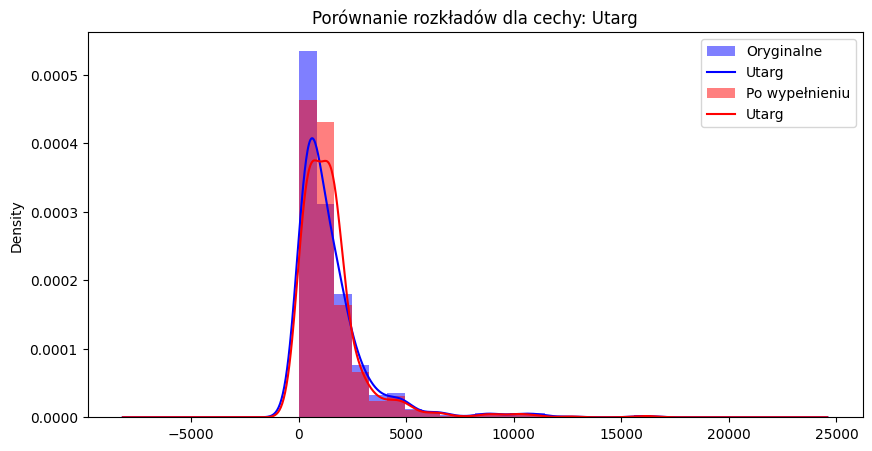

In [4]:
import matplotlib.pyplot as plt

def compare_distributions(df_1, df_2, feature, bins=20):
    plt.figure(figsize=(10, 5))

    df_1[feature].hist(bins=bins, alpha=0.5, density=True, color='blue', label='Oryginalne')
    df_1[feature].plot.density(color='blue')

    df_2[feature].hist(bins=bins, alpha=0.5, density=True, color='red', label='Po wypełnieniu')
    df_2[feature].plot.density(color='red')

    plt.title(f'Porównanie rozkładów dla cechy: {feature}')
    plt.legend()
    plt.show()

print(" Porównanie rozkładów cechy Utarg:")
compare_distributions(df_zam, df_filled, 'Utarg')

In [5]:
# 4.1
print("Średnia wartość zamówienia dla każdego kraju:")
print(df_zam.groupby('Kraj')['Utarg'].mean())

# 4.2
df_zam['Data zamowienia'] = pd.to_datetime(df_zam['Data zamowienia'])
df_zam['Rok'] = df_zam['Data zamowienia'].dt.year
df_zam['Miesiac'] = df_zam['Data zamowienia'].dt.month

print("Średnia wartość zamówienia dla każdego roku i miesiąca:")
print(df_zam.groupby(['Rok', 'Miesiac'])['Utarg'].mean())

# 4.3
print("Liczba zamówień dla każdego sprzedawcy w danym roku:")
print(df_zam.groupby(['Sprzedawca', 'Rok'])['idZamowienia'].count())

# 4.4
print("Sprzedawca z najwyższym utargiem w każdym kraju:")
top_sellers = df_zam.groupby(['Kraj', 'Sprzedawca'])['Utarg'].sum().reset_index()
top_sellers = top_sellers.loc[top_sellers.groupby('Kraj')['Utarg'].idxmax()]
print(top_sellers[['Kraj', 'Sprzedawca', 'Utarg']])

# 4.5
df_zam['Kwartal'] = df_zam['Data zamowienia'].dt.quarter
quarterly_sales = df_zam.groupby(['Rok', 'Kwartal'])['Utarg'].sum().sort_values(ascending=False)
print("Suma utargu w każdym kwartale (posortowane):")
print(quarterly_sales)

Średnia wartość zamówienia dla każdego kraju:
Kraj
Niemcy    1532.528236
Polska    1550.376326
Name: Utarg, dtype: float64
Średnia wartość zamówienia dla każdego roku i miesiąca:
Rok   Miesiac
2003  7          1218.251176
      8          1097.598696
      9           858.577143
      10         1456.390000
      11         1973.045000
      12         1443.086875
2004  1          1914.425000
      2          1164.535926
      3          1484.822187
      4          1053.214667
      5          1999.229687
      6          1669.432667
      7          1211.127097
      8          1562.998889
      9          1329.139737
      10         2064.032778
      11         1123.419722
      12         1632.980000
2005  1          1487.635357
      2          2132.384815
      3          1157.157910
      4          1931.107297
      5          1155.370000
Name: Utarg, dtype: float64
Liczba zamówień dla każdego sprzedawcy w danym roku:
Sprzedawca  Rok 
Callahan    2003    17
            2004   